# Loading the Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
# read dataset
df= pd.read_csv("Housing (1).csv")

In [4]:
# see top 5 rows

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# see column data type and some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# see dimensions

df.shape

(545, 13)

In [7]:
# check for duplicate values

df.duplicated().sum()

0

In [8]:
# see precentege of missing value in each column

df.isna().sum() / df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
# see quick info of numeric values

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
# see quick info of category values 

df.describe(include = object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


We Can see :

- Dataset no missing values
- Dataset has no complete duplicates
- We need to modify some columns

# Univariate Analysis & Visualizations

Column Types
- Numerical - Price, area
- Categorical - bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus

## Numerical Columns

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

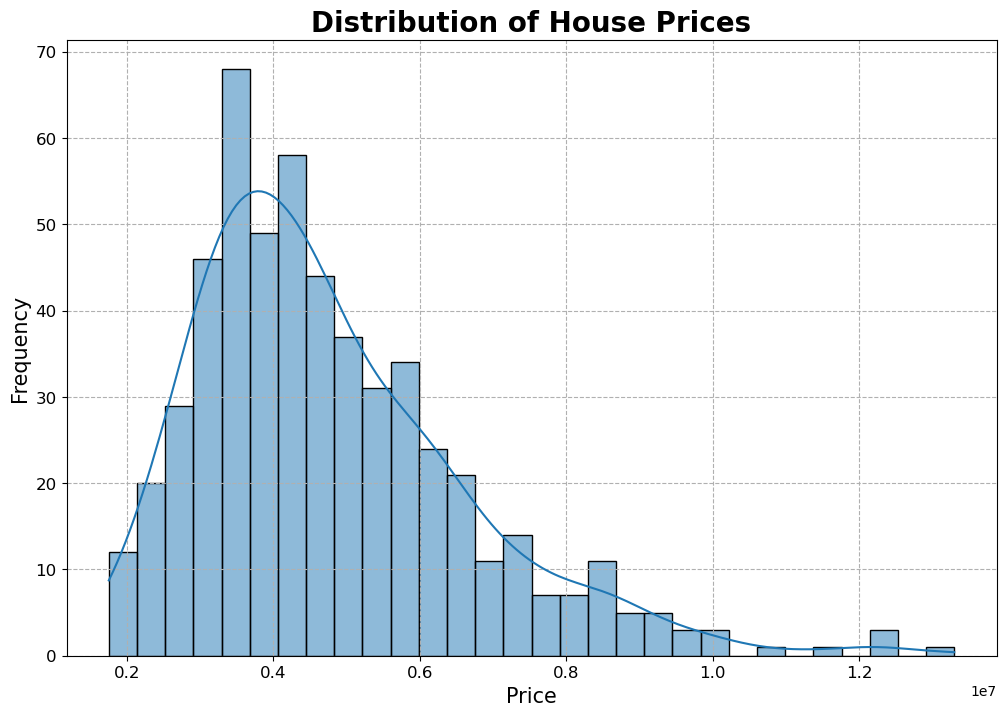

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=1)

# Display the plot
plt.show()

**Prices** <br>
Conclusions:
- Prices are right-skewed — most houses are moderately priced.
- Majority of houses cost around ₹3.5–₹4.5 million.
- A few very expensive houses (prices exceeding 10 million) act as outliers.

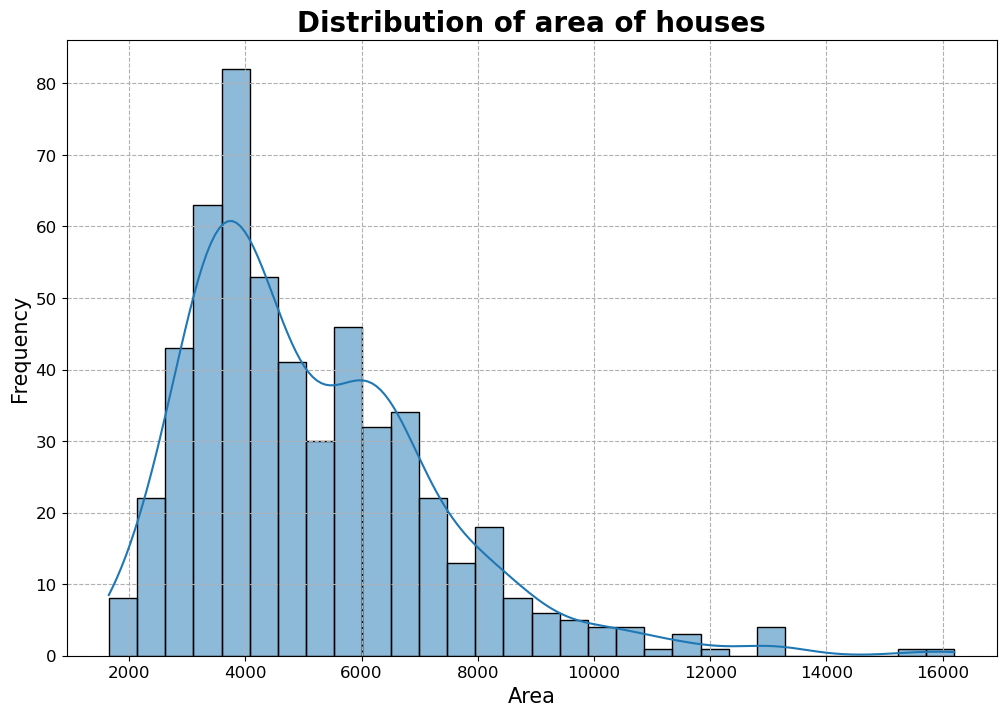

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(df['area'],bins=30,kde=True)
plt.title('Distribution of area of houses', fontsize=20, weight='bold')
plt.xlabel('Area', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=1)

# Display the plot
plt.show()

**Area**<br>
Conclusions:
- Most houses have areas between 3000–6000 sq. ft.
- A few houses have very large areas (up to 16,000 sq. ft.) — these are outliers.
- The distribution is right-skewed, meaning there are more small/medium houses than large ones.

## Categorical Columns

/var/folders/h2/3jh9mwk53cg6z20yjs0w4hp00000gn/T/ipykernel_4008/3758268052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df, palette='viridis')


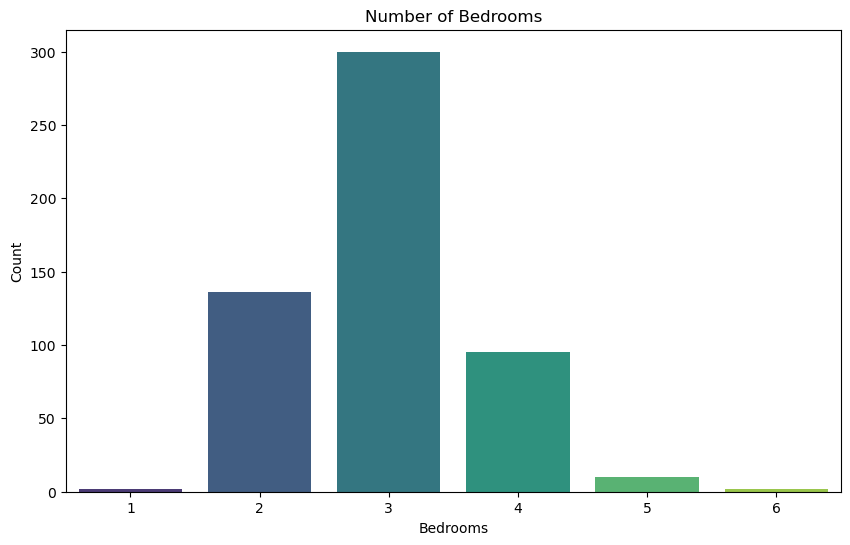

In [14]:
# Count Plot of Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

**Bedrooms**<br>
Conclusion:
- Most houses have 3 bedrooms (around 300 houses).
- The distribution shows that medium-sized homes (2–3 bedrooms) dominate the dataset.

/var/folders/h2/3jh9mwk53cg6z20yjs0w4hp00000gn/T/ipykernel_4008/1166032894.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=df, palette='viridis')


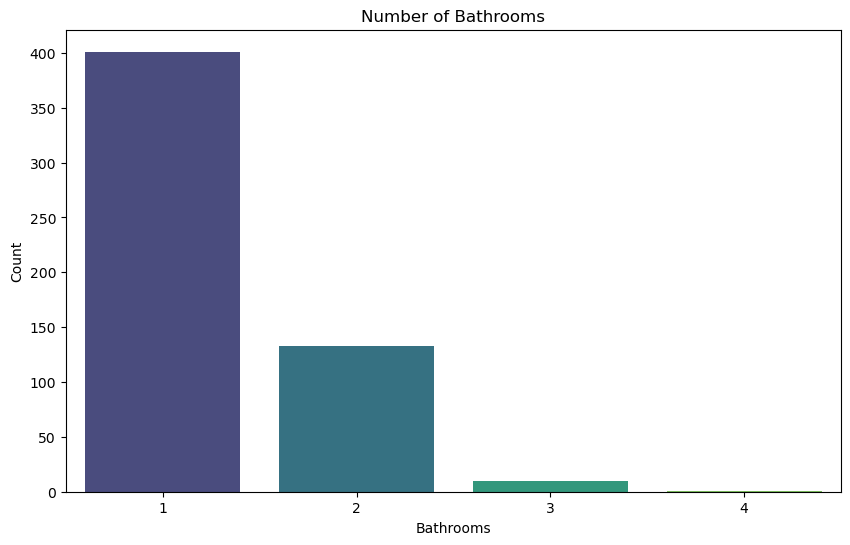

In [15]:
# Count Plot of Bathrooms

plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

**Bathrooms**<br>
Conclusion:
- The majority of houses have 1 bathroom (around 400 houses).
- Only a few houses have 3 bathrooms, and 4-bathroom houses are almost nonexistent.

In [16]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

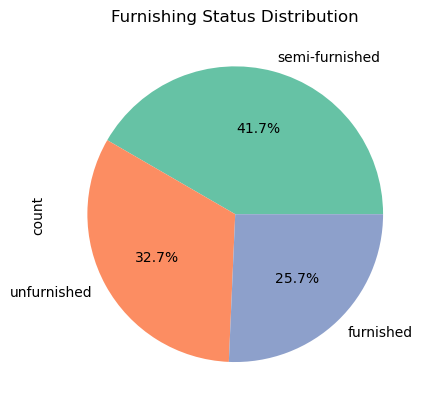

In [17]:
df['furnishingstatus'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Furnishing Status Distribution')
plt.show()

**Furnishing Status**<br>
Conclusions:
- Semi-furnished houses are the most common — 41.7% of total houses.
- Unfurnished houses make up 32.7%, showing a moderate share.
- Furnished houses are the least common — only 25.7% of the total.

# Bivariate Analysis & Visualizations

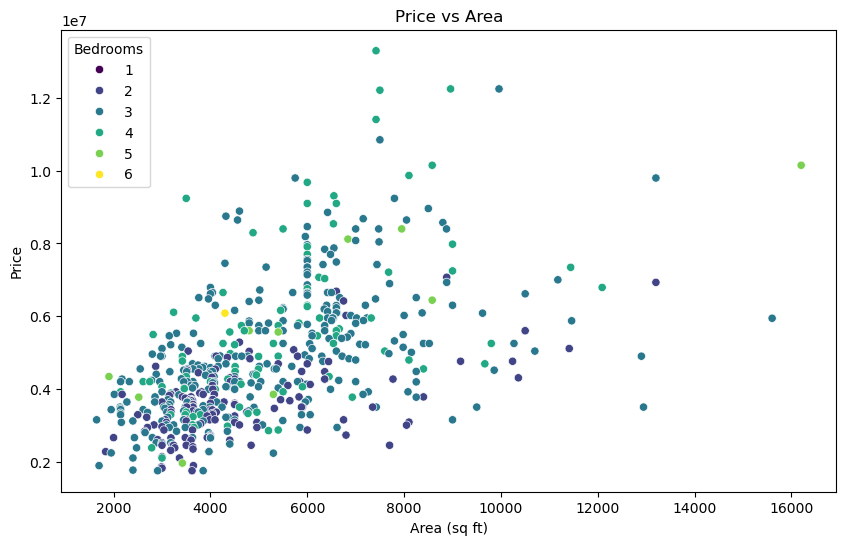

In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

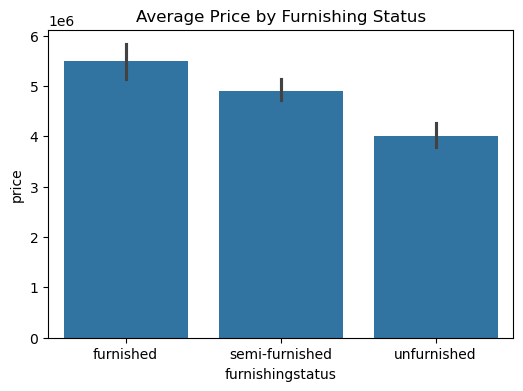

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="furnishingstatus", y="price", data=df, estimator='mean')
plt.title("Average Price by Furnishing Status")
plt.show()

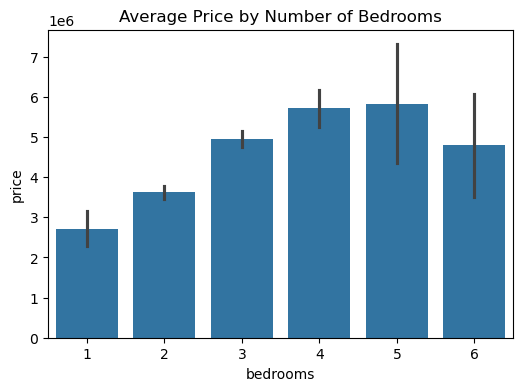

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x="bedrooms", y="price", data=df, estimator='mean')
plt.title("Average Price by Number of Bedrooms")
plt.show()

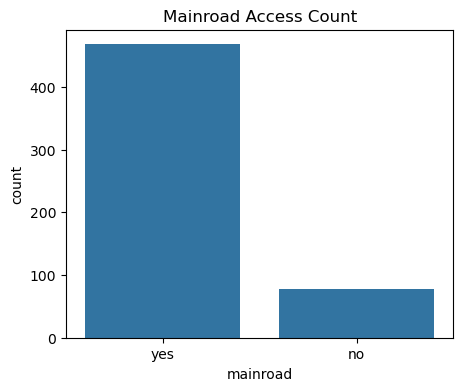

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x="mainroad", data=df)
plt.title("Mainroad Access Count")
plt.show()

# Multivariate Analysis

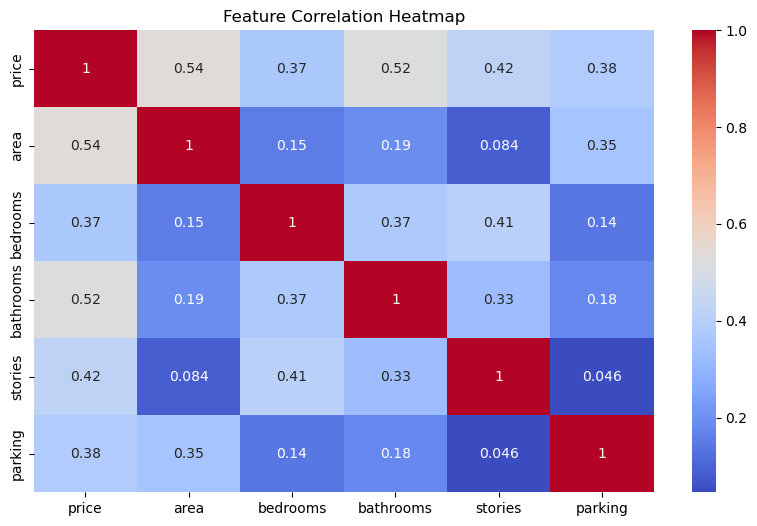

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Multivariate Analyisis**<br>
Conclusion:
- Price shows:
1. Strongest correlation with area (0.54) and bathrooms (0.52) — larger area or more bathrooms generally mean higher price.
2. Moderate correlation with stories (0.42) and bedrooms (0.37).
3. Weakest with parking (0.38).
- Area is weakly correlated with other features except price (0.54).
- Bedrooms have a moderate relationship with bathrooms (0.37) and stories (0.41 — more bedrooms often mean more floors and bathrooms.
- Parking shows very weak correlation with all other features — it doesn’t affect price much in this dataset.

# Splitting the data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X= df.drop(columns=['price'])
y=df['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [27]:
y_train.sample(5)

102    6195000
177    5243000
386    3535000
412    3430000
430    3290000
Name: price, dtype: int64

# Creating pipeline

In [28]:
# importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression


In [29]:
# Define numeric and categorical columns
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

In [32]:
# Combined preprocessing in one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # Numeric pipeline
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='median')),
            ('power', PowerTransformer(method='yeo-johnson')),
            ('scale', StandardScaler())
        ]), num_cols),

        # Categorical pipeline
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')),
            ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), cat_cols),
    ],
    remainder='drop'
)


In [33]:
# Final pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())])

# Fit and evaluate

In [34]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2: 0.6417750726812587
MAE: 988175.5963302752
RMSE: 1345612.5219132318


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
